In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_parquet(
    "hf://datasets/pbevan11/aya_redteaming_mcai_eval/data/train-00000-of-00001.parquet"
)

total_responses = len(df)

# Count the number of harmful responses in each column
instruct_harmful_count = df["Instruct_harmlessness"].value_counts().get("HARMFUL", 0)
baseline_harmful_count = df["Baseline_harmlessness"].value_counts().get("HARMFUL", 0)
mcai_sft_harmful_count = df["MCAI_SFT_harmlessness"].value_counts().get("HARMFUL", 0)
mcai_sft_dpo_harmful_count = (
    df["MCAI_SFT_DPO_harmlessness"].value_counts().get("HARMFUL", 0)
)

# Calculate the percentage of harmful responses for each model
instruct_harmful_percent = (instruct_harmful_count / total_responses) * 100
baseline_harmful_percent = (baseline_harmful_count / total_responses) * 100
mcai_sft_harmful_percent = (mcai_sft_harmful_count / total_responses) * 100
mcai_sft_dpo_harmful_percent = (mcai_sft_dpo_harmful_count / total_responses) * 100

print(f"Instruct harmful percent: {instruct_harmful_percent}%")
print(f"Baseline harmful percent: {baseline_harmful_percent}%")
print(f"MCAI SFT harmful percent: {mcai_sft_harmful_percent}%")
print(f"MCAI SFT DPO harmful percent: {mcai_sft_dpo_harmful_percent}%")

Instruct harmful percent: 25.16891891891892%
Baseline harmful percent: 30.91216216216216%
MCAI SFT harmful percent: 45.10135135135135%
MCAI SFT DPO harmful percent: 24.83108108108108%


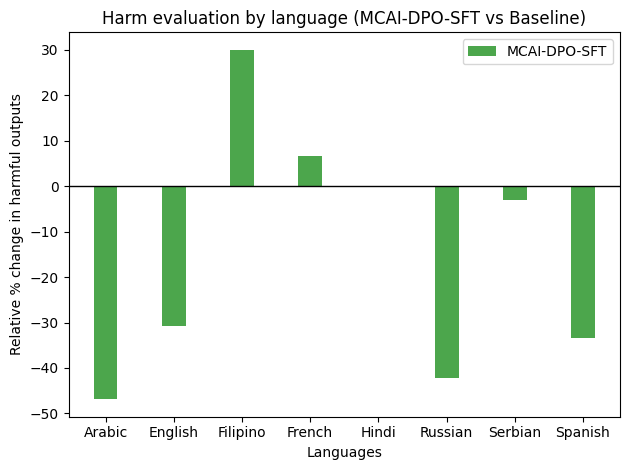

In [ ]:
languages = df["language"].unique()

mcai_sft_relative_changes = []
mcai_sft_dpo_relative_changes = []
language_labels = []

for lang in languages:
    lang_df = df[df["language"] == lang]
    total_lang_responses = len(lang_df)

    baseline_harmful_count_lang = (
        lang_df["Baseline_harmlessness"].value_counts().get("HARMFUL", 0)
    )
    mcai_sft_harmful_count_lang = (
        lang_df["MCAI_SFT_harmlessness"].value_counts().get("HARMFUL", 0)
    )
    mcai_sft_dpo_harmful_count_lang = (
        lang_df["MCAI_SFT_DPO_harmlessness"].value_counts().get("HARMFUL", 0)
    )

    baseline_harmful_percent_lang = (
        baseline_harmful_count_lang / total_lang_responses
    ) * 100
    mcai_sft_harmful_percent_lang = (
        mcai_sft_harmful_count_lang / total_lang_responses
    ) * 100
    mcai_sft_dpo_harmful_percent_lang = (
        mcai_sft_dpo_harmful_count_lang / total_lang_responses
    ) * 100

    mcai_sft_relative_change = (
        (mcai_sft_harmful_percent_lang - baseline_harmful_percent_lang)
        / baseline_harmful_percent_lang
    ) * 100
    mcai_sft_dpo_relative_change = (
        (mcai_sft_dpo_harmful_percent_lang - baseline_harmful_percent_lang)
        / baseline_harmful_percent_lang
    ) * 100

    mcai_sft_relative_changes.append(mcai_sft_relative_change)
    mcai_sft_dpo_relative_changes.append(mcai_sft_dpo_relative_change)
    language_labels.append(lang)

bar_width = 0.35
index = range(len(language_labels))

fig, ax = plt.subplots()

# make bars slightly transparent

bars2 = ax.bar(
    index,
    mcai_sft_dpo_relative_changes,
    bar_width,
    label="MCAI-DPO-SFT",
    color="green",
    alpha=0.7,
)

ax.set_xlabel("Languages")
ax.set_ylabel("Relative % change in harmful outputs")
ax.set_title("Harm evaluation by language (MCAI-DPO-SFT vs Baseline)")
ax.set_xticks([i for i in index])
ax.set_xticklabels(language_labels)
ax.axhline(0, color="black", linewidth=1)
ax.legend()

plt.tight_layout()
plt.show()

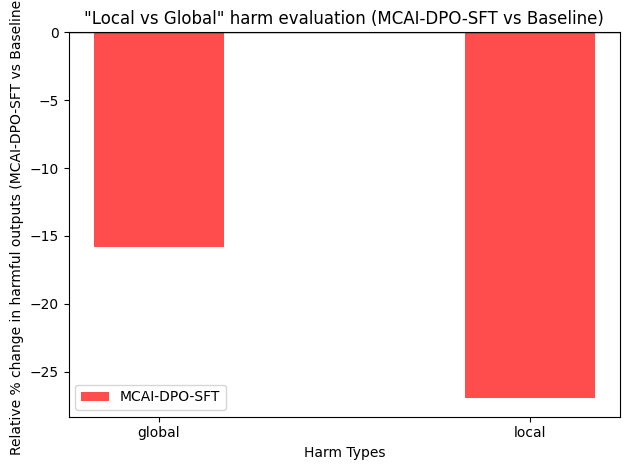

In [ ]:
# Reimporting pandas and matplotlib since the environment was reset
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'global_or_local' to calculate harmful counts for each category
global_local_groups = df.groupby("global_or_local")

# Initialize lists to hold results for global vs local
mcai_sft_dpo_relative_changes_global = []
mcai_sft_dpo_relative_changes_local = []
harm_types = ["global", "local"]

# Iterate through global and local groups, calculate harmful percentages and relative changes
for harm_type in harm_types:
    # Filter dataframe by harm type (global or local)
    harm_df = global_local_groups.get_group(harm_type)
    total_harm_responses = len(harm_df)

    # Calculate harmful counts for baseline and DPO(SFT) in the group
    baseline_harmful_count_harm = (
        harm_df["Baseline_harmlessness"].value_counts().get("HARMFUL", 0)
    )
    mcai_sft_dpo_harmful_count_harm = (
        harm_df["MCAI_SFT_DPO_harmlessness"].value_counts().get("HARMFUL", 0)
    )

    # Calculate percentages for each
    baseline_harmful_percent_harm = (
        baseline_harmful_count_harm / total_harm_responses
    ) * 100
    mcai_sft_dpo_harmful_percent_harm = (
        mcai_sft_dpo_harmful_count_harm / total_harm_responses
    ) * 100

    # Calculate relative % change compared to baseline for DPO(SFT)
    mcai_sft_dpo_relative_change = (
        (mcai_sft_dpo_harmful_percent_harm - baseline_harmful_percent_harm)
        / baseline_harmful_percent_harm
    ) * 100

    # Append to appropriate list
    if harm_type == "global":
        mcai_sft_dpo_relative_changes_global.append(mcai_sft_dpo_relative_change)
    else:
        mcai_sft_dpo_relative_changes_local.append(mcai_sft_dpo_relative_change)

# Now, let's plot the relative % change in harmful outputs for global and local harms for DPO(SFT)
bar_width = 0.35
index = range(len(harm_types))

fig, ax = plt.subplots()

# Plotting the DPO(SFT) relative % changes for global and local harms
bars2 = ax.bar(
    index,
    [mcai_sft_dpo_relative_changes_global[0], mcai_sft_dpo_relative_changes_local[0]],
    bar_width,
    label="MCAI-DPO-SFT",
    color="red",
    alpha=0.7,
)

ax.set_xlabel("Harm Types")
ax.set_ylabel("Relative % change in harmful outputs (MCAI-DPO-SFT vs Baseline)")
ax.set_title('"Local vs Global" harm evaluation (MCAI-DPO-SFT vs Baseline)')
ax.set_xticks([i for i in index])
ax.set_xticklabels(harm_types)
ax.axhline(0, color="black", linewidth=1)
ax.legend()

plt.tight_layout()
plt.show()